## GRIP task 3

K-Means Clustering. We try to find the optimal number of clusters to use for the iris dataset.

In [1]:
import random
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
%matplotlib inline

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Elbow method to find optimal number of clusters

To find the optimal number of clusters, we use what is known as the elbow method. The elbow method is similar to a brute force algorithm. It runs the k means algorithm over and over again while increasing the number of clusters and plotting it against the corresponding score. Here, we run it for cluster sizes of 1-10

The position where the elbow occurs is the optimal number of clusters. We will now try to find the optimal cluster

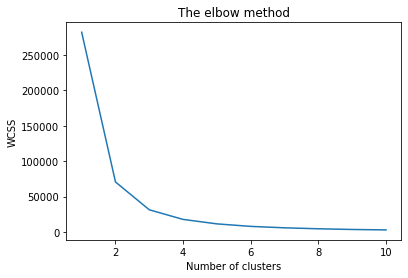

In [4]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here, we can see that the elbow occurs when the number of clusters = 3. So, 3 is the optimal number of clusters.

Perform K-means with a cluster size of 3

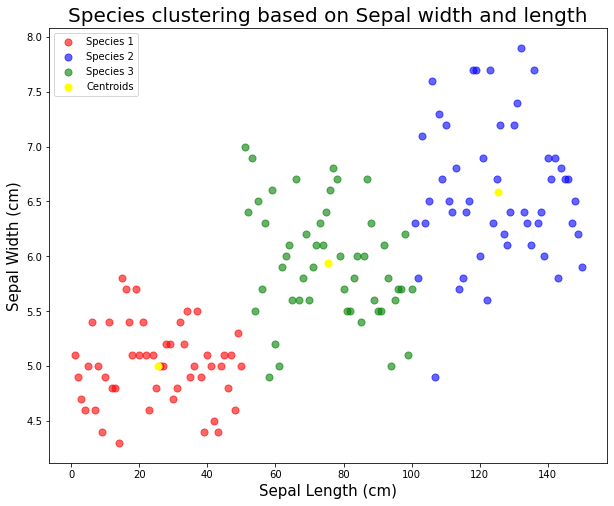

In [5]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)
labels=kmeans.predict(x)
df['Label']=labels

df_a=df[df['Label']==0]
df_b=df[df['Label']==1]
df_c=df[df['Label']==2]

plt.figure(figsize=(10,8))
plt.title('Species clustering based on Sepal width and length',size=20)

plt.scatter(df_a.iloc[:,0],df_a.iloc[:,1],c='red',s=50,alpha=0.6,label='Species 1')
plt.scatter(df_b.iloc[:,0],df_b.iloc[:,1],c='blue',s=50,alpha=0.6,label='Species 2')
plt.scatter(df_c.iloc[:,0],df_c.iloc[:,1],c='green',s=50,alpha=0.6,label='Species 3')

plt.xlabel('Sepal Length (cm)',size=15)
plt.ylabel('Sepal Width (cm)',size=15)


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')



plt.legend()